In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sn
import os
from sklearn.preprocessing import OneHotEncoder
import nltk

In [66]:
#users = pd.read_csv('../Data/PP_users.csv')
#recipes = pd.read_csv('../Data/PP_recipes.csv')
raw_interactions = pd.read_csv('../Data/RAW_interactions.csv')
raw_recipes = pd.read_csv('../Data/RAW_recipes.csv')

In [58]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [59]:
# filter based on no. of reviews per user >= 10
# solves cold start problem
raw_interactions[raw_interactions['user_id'].map(raw_interactions['user_id'].value_counts()) >= 45]['user_id'].value_counts()

424680     7671
37449      5603
383346     4628
169430     4076
128473     3917
           ... 
1683962      45
40211        45
149432       45
542900       45
680724       45
Name: user_id, Length: 3041, dtype: int64

In [60]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [68]:
dfinal = raw_interactions.merge(raw_recipes, how='inner', left_on='recipe_id', right_on='id')
dfinal.head()

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,44394,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,85009,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,85009,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


In [69]:
counts_col2 = dfinal.groupby("user_id")["user_id"].transform(len)
counts_col3 = dfinal.groupby("recipe_id")["recipe_id"].transform(len)

mask = (counts_col2 >= 100) & (counts_col3 >= 100)

dfinal = dfinal[mask]

In [70]:
dfinal.drop(columns=['id','date','submitted'],inplace=True)
dfinal.head()

,user_id,recipe_id,rating,review,name,minutes,contributor_id,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
1479,327989,9054,3,I liked this recipe but there are no measureme...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,"['mix mashed potatoes , egg , flour , salt , p...",this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11
1480,240552,9054,5,These are great! I had some mashed potatoes f...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,"['mix mashed potatoes , egg , flour , salt , p...",this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11
1481,206747,9054,4,I commented on another recipe here -- if the l...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,"['mix mashed potatoes , egg , flour , salt , p...",this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11
1487,936601,9054,5,Great way to use left over mashed potatoes. I...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,"['mix mashed potatoes , egg , flour , salt , p...",this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11
1489,485151,9054,5,Oh yummy! These were just like the ones I had ...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,"['mix mashed potatoes , egg , flour , salt , p...",this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11


In [71]:
dfinal['user_id']

1479       327989
1480       240552
1481       206747
1487       936601
1489       485151
            ...  
1130240    319738
1130241    364211
1130242    500860
1130244    302961
1130247    199418
Name: user_id, Length: 39398, dtype: int64

# Separating nutrition columns

- from string to respective categories
- convert them to float type

In [72]:
dfinal[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = dfinal.nutrition.str.split(",",expand=True)

In [9]:
dfinal.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,...,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,[204.8,5.0,9.0,26.0,24.0,2.0,10.0]
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,[204.8,5.0,9.0,26.0,24.0,2.0,10.0]
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",...,NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4,[132.3,11.0,39.0,5.0,4.0,11.0,5.0]
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,[2786.2,342.0,134.0,290.0,161.0,301.0,42.0]
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,[2786.2,342.0,134.0,290.0,161.0,301.0,42.0]


In [73]:
dfinal['calories'] =  dfinal['calories'].apply(lambda x: x.replace('[','')) 
dfinal['carbohydrates (PDV)'] =  dfinal['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))
dfinal.head()

,user_id,recipe_id,rating,review,name,minutes,contributor_id,tags,nutrition,n_steps,...,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
1479,327989,9054,3,I liked this recipe but there are no measureme...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0
1480,240552,9054,5,These are great! I had some mashed potatoes f...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0
1481,206747,9054,4,I commented on another recipe here -- if the l...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0
1487,936601,9054,5,Great way to use left over mashed potatoes. I...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0
1489,485151,9054,5,Oh yummy! These were just like the ones I had ...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0


In [74]:
dfinal[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = dfinal[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

In [75]:
dfinal.head()

,user_id,recipe_id,rating,review,name,minutes,contributor_id,tags,nutrition,n_steps,...,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
1479,327989,9054,3,I liked this recipe but there are no measureme...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0
1480,240552,9054,5,These are great! I had some mashed potatoes f...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0
1481,206747,9054,4,I commented on another recipe here -- if the l...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0
1487,936601,9054,5,Great way to use left over mashed potatoes. I...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0
1489,485151,9054,5,Oh yummy! These were just like the ones I had ...,leftover mashed potato pancakes,35,8381,"['60-minutes-or-less', 'time-to-make', 'course...","[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",7,...,this recipe was recently submitted to a news g...,"['mashed potatoes', 'egg', 'flour', 'salt', 'p...",11,266.9,5.0,13.0,27.0,17.0,7.0,16.0


# EDA

1. Top-5 popular recipes
2. Time taken - sieve out outliers 
3. Tags: one-hot encoding
4. Number of steps of recipes 
5. No. of ingredients 
6. Healthiness of recipe 
7. Most common ingredients

In [13]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1132367 non-null  int64  
 1   recipe_id            1132367 non-null  int64  
 2   date                 1132367 non-null  object 
 3   rating               1132367 non-null  int64  
 4   review               1132198 non-null  object 
 5   name                 1132366 non-null  object 
 6   minutes              1132367 non-null  int64  
 7   contributor_id       1132367 non-null  int64  
 8   submitted            1132367 non-null  object 
 9   tags                 1132367 non-null  object 
 10  nutrition            1132367 non-null  object 
 11  n_steps              1132367 non-null  int64  
 12  steps                1132367 non-null  object 
 13  description          1108857 non-null  object 
 14  ingredients          1132367 non-null  object 
 15

In [14]:
dfinal.dropna(subset=['review', 'description'],inplace=True)
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108689 entries, 0 to 1132366
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1108689 non-null  int64  
 1   recipe_id            1108689 non-null  int64  
 2   date                 1108689 non-null  object 
 3   rating               1108689 non-null  int64  
 4   review               1108689 non-null  object 
 5   name                 1108688 non-null  object 
 6   minutes              1108689 non-null  int64  
 7   contributor_id       1108689 non-null  int64  
 8   submitted            1108689 non-null  object 
 9   tags                 1108689 non-null  object 
 10  nutrition            1108689 non-null  object 
 11  n_steps              1108689 non-null  int64  
 12  steps                1108689 non-null  object 
 13  description          1108689 non-null  object 
 14  ingredients          1108689 non-null  object 
 15

In [15]:
dfinal.describe()

,user_id,recipe_id,rating,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06,1.108689e+06
mean,1.395401e+08,1.636849e+05,4.411931e+00,3.691645e+04,2.703059e+06,9.639689e+00,8.956281e+00,4.590743e+02,3.459841e+01,7.810713e+01,3.197191e+01,3.571835e+01,4.406539e+01,1.486151e+01
std,5.032718e+08,1.302242e+05,1.264992e+00,8.889928e+06,6.833851e+07,5.824182e+00,3.697391e+00,1.035089e+03,7.346674e+01,6.406404e+02,1.212180e+02,7.492313e+01,9.491503e+01,6.619555e+01
min,1.533000e+03,3.800000e+01,0.000000e+00,0.000000e+00,2.700000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.369790e+05,5.749700e+04,4.000000e+00,2.100000e+01,3.763600e+04,6.000000e+00,6.000000e+00,1.764000e+02,9.000000e+00,9.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00,4.000000e+00
50%,3.339900e+05,1.246170e+05,5.000000e+00,4.000000e+01,9.134000e+04,8.000000e+00,9.000000e+00,3.126000e+02,2.000000e+01,2.400000e+01,1.600000e+01,1.800000e+01,2.300000e+01,9.000000e+00
75%,8.069970e+05,2.476170e+05,5.000000e+00,7.000000e+01,2.464820e+05,1.200000e+01,1.100000e+01,5.126000e+02,4.000000e+01,6.700000e+01,3.500000e+01,5.300000e+01,5.200000e+01,1.600000e+01
max,2.002373e+09,5.377160e+05,5.000000e+00,2.147484e+09,2.002290e+09,1.450000e+02,4.300000e+01,4.343602e+05,1.718300e+04,3.627290e+05,2.933800e+04,6.552000e+03,1.039500e+04,3.609800e+04


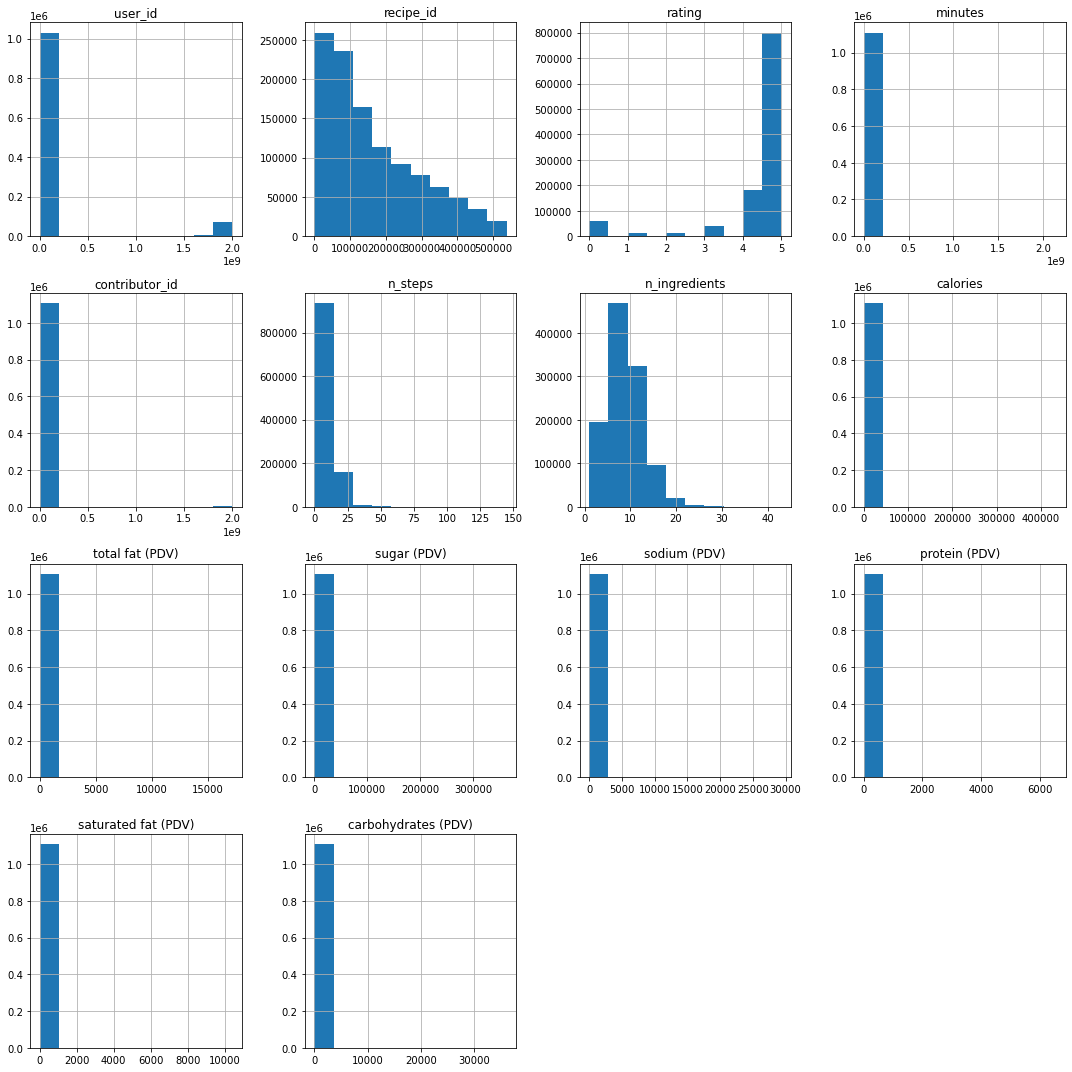

In [16]:
%matplotlib inline

dfinal.hist(figsize = (15,15))
plt.tight_layout() # put space into the graph
plt.show()

In [17]:
dfinal.skew()

C:\Users\limst\AppData\Local\Temp/ipykernel_17848/1357281838.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfinal.skew()


user_id                  3.352318
recipe_id                0.859627
rating                  -2.574033
minutes                241.555794
contributor_id          27.477376
n_steps                  2.218086
n_ingredients            0.784399
calories               207.128396
total fat (PDV)         33.236577
sugar (PDV)            491.650158
sodium (PDV)            56.754115
protein (PDV)           51.757564
saturated fat (PDV)     20.865164
carbohydrates (PDV)    439.480595
dtype: float64

In [21]:
corrMatrix = dfinal.corr()

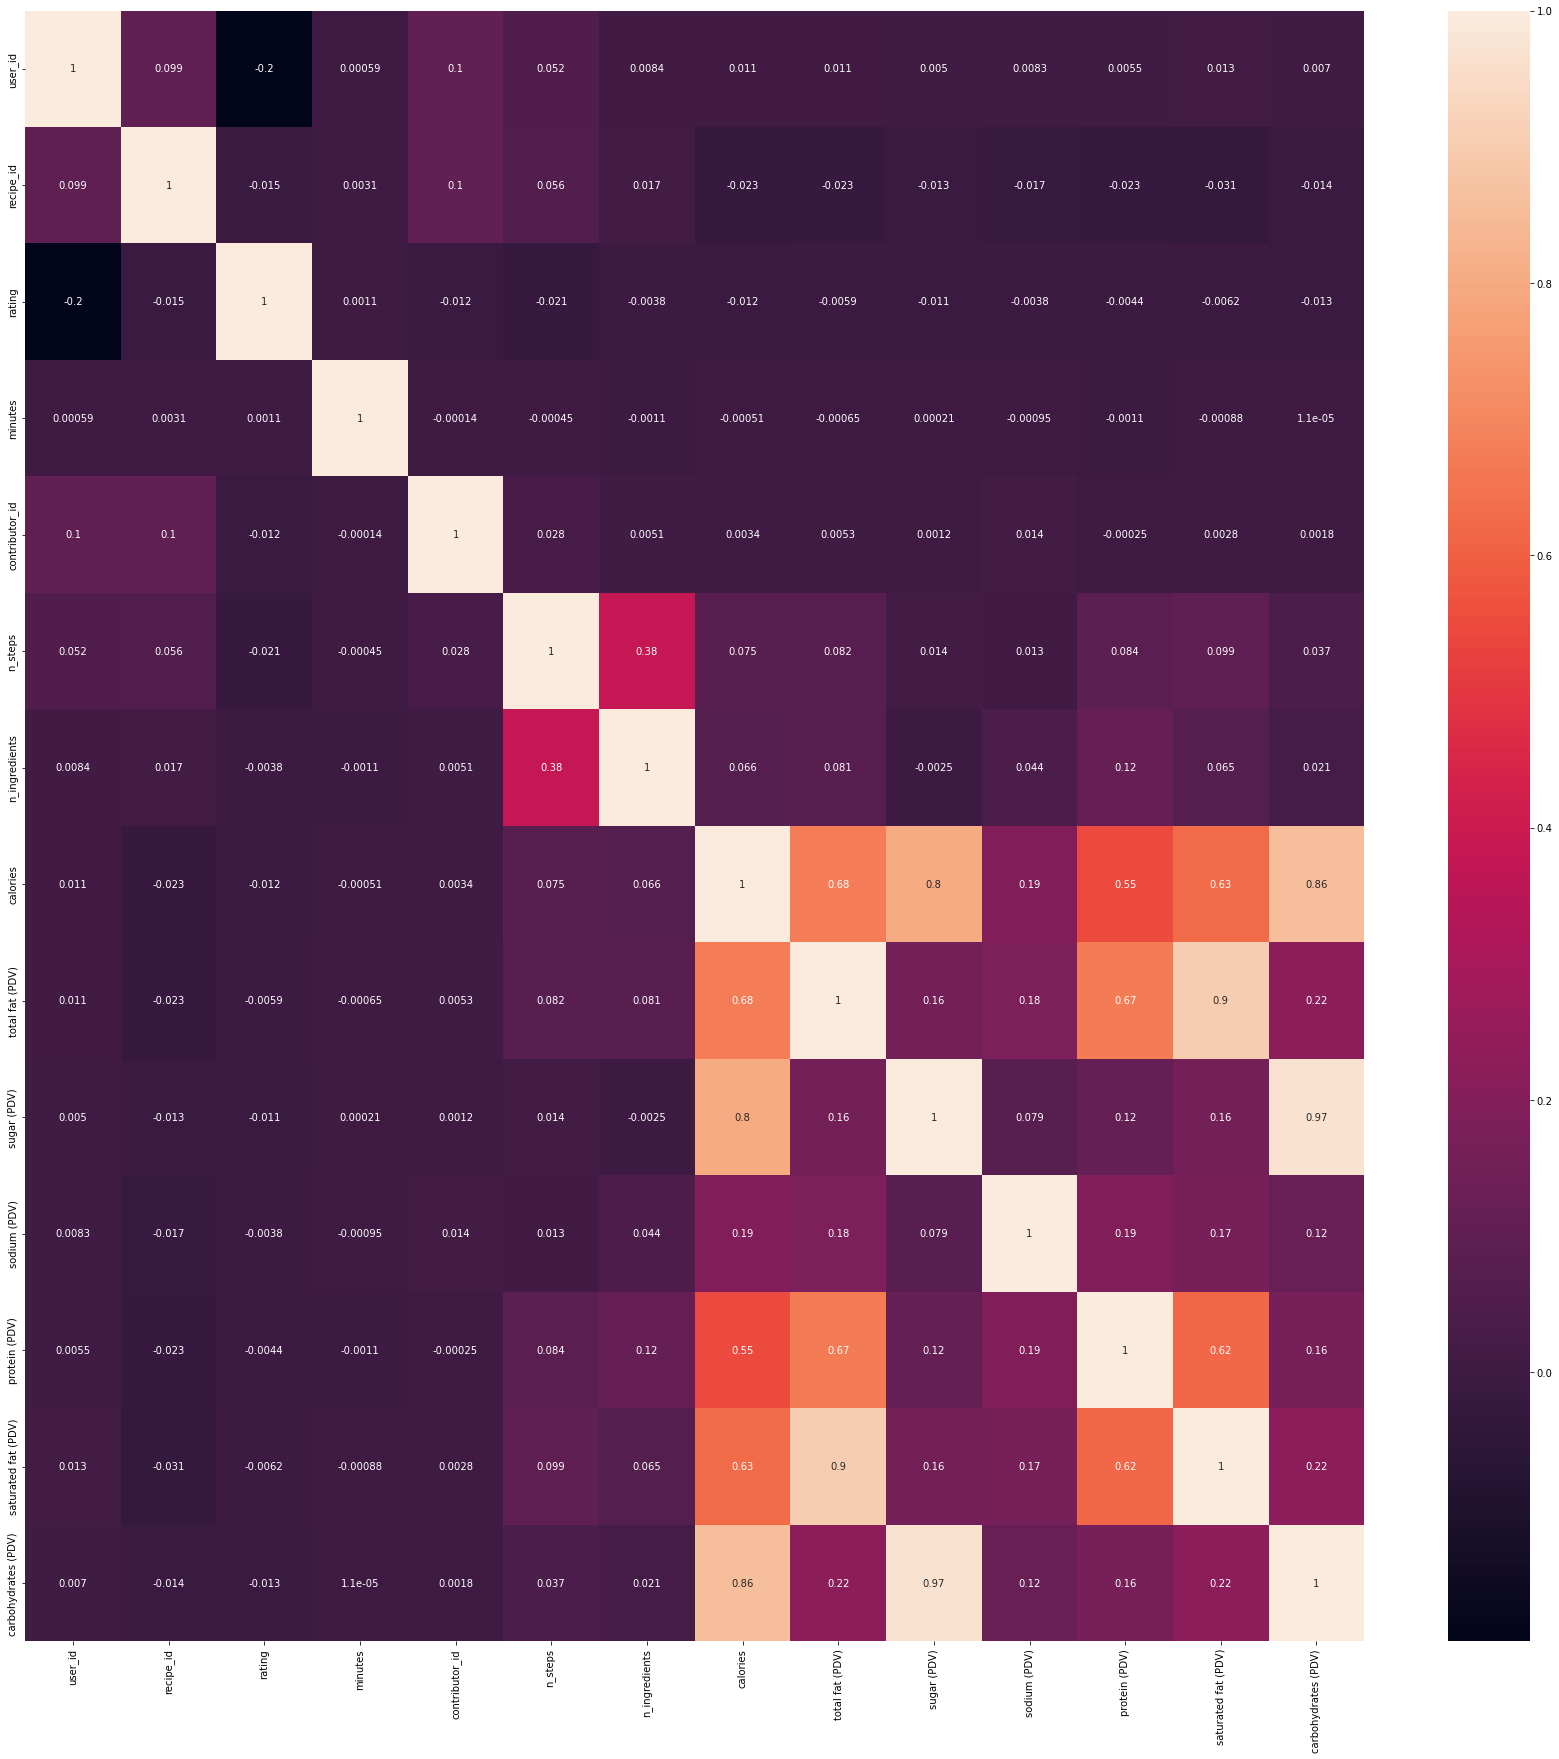

In [29]:
fig, ax = plt.subplots(figsize=(30,30))
sn.heatmap(corrMatrix, annot=True)
plt.show()

Findings:
- User rating is not affected by the duration to make the recipe, as well as, the number of steps and ingredients. 
- No. of steps is positively related to no. of ingredients (0.38)
- Nutritional components are correlated to one another

# Review Analysis

- Length of review compare with ratings
- Sentiments of review compare with ratings
- 

In [52]:
dfreview = dfinal[['review','rating']]
dfreview.head()

,review,rating
0,Great with a salad. Cooked on top of stove for...,4
1,"So simple, so delicious! Great for chilly fall...",5
3,I made the Mexican topping and took it to bunk...,5
4,"Made the cheddar bacon topping, adding a sprin...",5
5,very very sweet. after i waited the 2 days i b...,4


In [53]:
dfreview['length'] = dfreview['review'].str.len()
dfreview.head()

C:\Users\limst\AppData\Local\Temp/ipykernel_17848/2703976418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreview['length'] = dfreview['review'].str.len()


,review,rating,length
0,Great with a salad. Cooked on top of stove for...,4,138
1,"So simple, so delicious! Great for chilly fall...",5,205
3,I made the Mexican topping and took it to bunk...,5,68
4,"Made the cheddar bacon topping, adding a sprin...",5,73
5,very very sweet. after i waited the 2 days i b...,4,175


In [57]:
dfreview[dfreview['rating'] <= 3]

,review,rating,length
6,"Just an observation, so I will not rate. I fo...",0,605
7,This recipe was OVERLY too sweet. I would sta...,2,482
12,Made my own buttermilk w/ vinegar and milk. U...,0,324
23,This is a very good recipe. We also want to c...,0,105
25,"The ""cornbread"" on top is bland. I'd us a real...",3,90
...,...,...,...
1132341,Would this make a good hamburger patty seasoning?,0,49
1132345,I made this recipe with blackberry jam instead...,3,246
1132347,"Not bad, but too tart for me. The flavour of t...",3,75
1132350,"This was just OK. When I first tasted it, I fo...",3,509


In [60]:
dfreview.drop(dfreview[dfreview['rating'] <= 3].index,inplace=True)

C:\Users\limst\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
one_hot = pd.get_dummies(dfreview['rating'], prefix='Rating') 
dfreview = dfreview.join(one_hot)

In [63]:
dfreview.head()

,review,rating,length,Rating_4,Rating_5
0,Great with a salad. Cooked on top of stove for...,4,138,1,0
1,"So simple, so delicious! Great for chilly fall...",5,205,0,1
3,I made the Mexican topping and took it to bunk...,5,68,0,1
4,"Made the cheddar bacon topping, adding a sprin...",5,73,0,1
5,very very sweet. after i waited the 2 days i b...,4,175,1,0


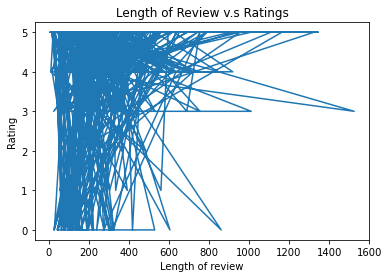

In [47]:
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 10000

x = dfreview['length'][:1000]
y = dfreview['rating'][:1000]
plt.plot(x,y)
plt.title('Length of Review v.s Ratings')
plt.xlabel('Length of review')
plt.ylabel('Rating')
plt.show()

<AxesSubplot:title={'center':'length'}, xlabel='[Rating_4, Rating_5]'>

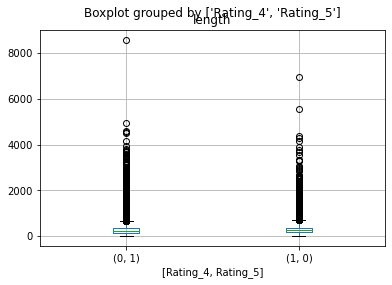

In [67]:
dfreview.boxplot(column = ['length'],by=['Rating_4','Rating_5'])

[(1.0, 500.0)]

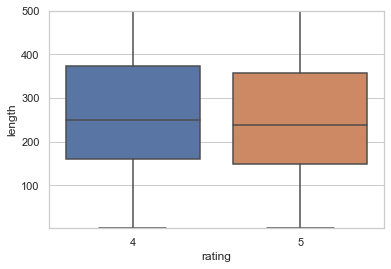

In [88]:
ax = sns.boxplot(x='rating',y='length',data=dfreview)
ax.set(ylim=(min(dfreview['length']), 500))

Findings: Length of reviews does not affect the users'rating on the recipes
- Median of the length is similar for both rating 4 and 5 (~250 words)

In [39]:
from nltk.tokenize import RegexpTokenizer 

#RegexpTokenizer.tokenize(text) returns text as a list of words with punctuation's removed.
retokenizer = RegexpTokenizer(r'[\w@]+') 

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#create lemmatizer
wnl = nltk.stem.wordnet.WordNetLemmatizer()

In [90]:
def process_text(documents):
    processed_tokens = []
    doc_tokens = []
    for doc in documents:
        doc = doc.lower()  # change all characters to lower case
        doc_tokens = retokenizer.tokenize(doc) # remove punctuations and tokenize the documents
        doc_tokens = [token for token in doc_tokens if token not in stop_words] # remove stop words
        doc_tokens = [wnl.lemmatize(token) for token in doc_tokens] # lemmatize the words
        processed_tokens.append(doc_tokens) # save the pre-processed tokens to a variable called processed_tokens
    return processed_tokens

In [ ]:
for index, rows in final.iterrows():
    tweet = rows['content']
    tweet = remove_hashtag_mentions_urls(tweet)
    tweet = remove_emoji(tweet)
    #separates the sentence by words
    text_tokenize = word_tokenize(tweet)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = " ".join(text_words_only)

    final.at[index,'content'] = text_joined

In [104]:
clean_data = process_text(dfreview['review'])

In [105]:
copy2 = clean_data

In [106]:
copy2[0:10]

[['great',
  'salad',
  'cooked',
  'top',
  'stove',
  '15',
  'minute',
  'added',
  'shake',
  'cayenne',
  'pinch',
  'salt',
  'used',
  'low',
  'fat',
  'sour',
  'cream',
  'thanks'],
 ['simple',
  'delicious',
  'great',
  'chilly',
  'fall',
  'evening',
  'doubled',
  'br',
  'br',
  'second',
  'time',
  'around',
  'forgot',
  'remaining',
  'cumin',
  'usually',
  'love',
  'cumin',
  'notice',
  'missing',
  '1',
  '2',
  'teaspoon'],
 ['made', 'mexican', 'topping', 'took', 'bunko', 'everyone', 'loved'],
 ['made',
  'cheddar',
  'bacon',
  'topping',
  'adding',
  'sprinkling',
  'black',
  'pepper',
  'yum'],
 ['sweet',
  'waited',
  '2',
  'day',
  'bought',
  '2',
  'pint',
  'raspberry',
  'added',
  'mix',
  'going',
  'add',
  'cake',
  'filling',
  'today',
  'take',
  'photo'],
 ['good'],
 ['better', 'real'],
 ['absolutely',
  'awesome',
  'speechless',
  'tried',
  'never',
  'juicy',
  'melt',
  'mouth',
  'chicken',
  'made',
  'home',
  'would',
  'however',


In [103]:
clean_data[0:100]

"[ ' g r e a t ' ,   ' s a l a d ' ,   ' c o o k e d ' ,   ' t o p ' ,   ' s t o v e ' ,   ' 1 5 ' , "

In [ ]:
joined_data = " ".join(row for row in clean_data)

In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Printing the sentiment nicely in a table format. 
my_vader_score_compound = [ ] 
my_vader_score_positive = [ ] 
my_vader_score_negative = [ ] 
my_vader_score_neutral = [ ] 

for i in range(len(dfreview['review'])):
    my_analyzer = analyzer.polarity_scores(dfreview['review'].iloc[i])
    my_vader_score_compound.append(my_analyzer['compound'])
    my_vader_score_positive.append(my_analyzer['pos'])
    my_vader_score_negative.append(my_analyzer['neg']) 
    my_vader_score_neutral.append(my_analyzer['neu']) 


#converting sentiment values to numpy for easier usage
my_vader_score_compound = np.array(my_vader_score_compound)
my_vader_score_positive = np.array(my_vader_score_positive)
my_vader_score_negative = np.array(my_vader_score_negative)
my_vader_score_neutral = np.array(my_vader_score_neutral)

In [110]:
dfreview['compound'] = my_vader_score_compound
dfreview['postve'] = my_vader_score_positive
dfreview['neg'] = my_vader_score_negative
dfreview['neu'] = my_vader_score_neutral

# This option is just to restrict the column width for printing purposes.
pd.options.display.max_colwidth = 40

# Print the dataframe
dfreview

,review,rating,length,Rating_4,Rating_5,compound,postve,neg,neu
0,Great with a salad. Cooked on top of...,4,138,1,0,0.7184,0.278,0.120,0.601
1,"So simple, so delicious! Great for c...",5,205,0,1,0.8895,0.325,0.000,0.675
3,I made the Mexican topping and took ...,5,68,0,1,0.5994,0.262,0.000,0.738
4,"Made the cheddar bacon topping, addi...",5,73,0,1,0.0000,0.000,0.000,1.000
5,very very sweet. after i waited the ...,4,175,1,0,0.5531,0.106,0.000,0.894
...,...,...,...,...,...,...,...,...,...
1132361,Just as the title promised this is a...,5,242,0,1,0.8481,0.195,0.000,0.805
1132362,I made this over the weekend and cha...,4,391,1,0,-0.3919,0.000,0.039,0.961
1132363,"Fabulous! We are vegetarian, so I us...",5,222,0,1,0.8497,0.219,0.000,0.781
1132364,Very tender and juicy - had trouble...,4,265,1,0,0.8528,0.165,0.058,0.778


# Word Cloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
import wordcloud as wc

cloud = wc.WordCloud(stopwords=STOPWORDS,color_func=wc.get_single_color_func('darkorange'),
                    background_color='white',max_words=2000,random_state=42,
                    width=2000, height=1000,contour_color='black',contour_width=2).generate(joined_data)
plt.figure(figsize=[7,7])

plt.imshow(cloud,interpolation='bilinear')
plt.axis("off");

# One-hot encoding of Tags

In [76]:
dftags = dfinal[['recipe_id','tags']]
dftags.head()

,recipe_id,tags
1479,9054,"['60-minutes-or-less', 'time-to-make', 'course..."
1480,9054,"['60-minutes-or-less', 'time-to-make', 'course..."
1481,9054,"['60-minutes-or-less', 'time-to-make', 'course..."
1487,9054,"['60-minutes-or-less', 'time-to-make', 'course..."
1489,9054,"['60-minutes-or-less', 'time-to-make', 'course..."


In [107]:
dftags.drop_duplicates(inplace=True)
dftags.head()

C:\Users\limst\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,recipe_id,tags
1479,9054,"['60-minutes-or-less', 'time-to-make', 'course..."
1770,135585,"['60-minutes-or-less', 'time-to-make', 'course..."
2795,93886,"['time-to-make', 'course', 'main-ingredient', ..."
4212,96886,"['60-minutes-or-less', 'time-to-make', 'course..."
5107,50022,"['weeknight', 'time-to-make', 'course', 'main-..."


In [191]:
dftags.reset_index(drop=True,inplace=True)
dftags

,recipe_id,tags,list
0,9054,"['60-minutes-or-less', 'time-to-make', 'course...","[60-minutes-or-less, time-to-make, course, mai..."
1,135585,"['60-minutes-or-less', 'time-to-make', 'course...","[60-minutes-or-less, time-to-make, course, mai..."
2,93886,"['time-to-make', 'course', 'main-ingredient', ...","[time-to-make, course, main-ingredient, prepar..."
3,96886,"['60-minutes-or-less', 'time-to-make', 'course...","[60-minutes-or-less, time-to-make, course, mai..."
4,50022,"['weeknight', 'time-to-make', 'course', 'main-...","[weeknight, time-to-make, course, main-ingredi..."
...,...,...,...
780,47391,"['30-minutes-or-less', 'time-to-make', 'course...","[30-minutes-or-less, time-to-make, course, mai..."
781,131018,"['time-to-make', 'course', 'main-ingredient', ...","[time-to-make, course, main-ingredient, cuisin..."
782,57679,"['30-minutes-or-less', 'time-to-make', 'course...","[30-minutes-or-less, time-to-make, course, mai..."
783,219251,"['time-to-make', 'main-ingredient', 'preparati...","[time-to-make, main-ingredient, preparation, e..."


In [194]:
dftags.drop(['tags'],axis=1,inplace=True)
dftags

C:\Users\limst\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,recipe_id,list
0,9054,"[60-minutes-or-less, time-to-make, course, mai..."
1,135585,"[60-minutes-or-less, time-to-make, course, mai..."
2,93886,"[time-to-make, course, main-ingredient, prepar..."
3,96886,"[60-minutes-or-less, time-to-make, course, mai..."
4,50022,"[weeknight, time-to-make, course, main-ingredi..."
...,...,...
780,47391,"[30-minutes-or-less, time-to-make, course, mai..."
781,131018,"[time-to-make, course, main-ingredient, cuisin..."
782,57679,"[30-minutes-or-less, time-to-make, course, mai..."
783,219251,"[time-to-make, main-ingredient, preparation, e..."


In [159]:
from sklearn.preprocessing import MultiLabelBinarizer

for index,row in dftags.iterrows():
    tag_list = tags_to_list(row['tags'])
    dftags.at[index,'list'] = tag_list

# Create MultilabelBinarizer object
one_hot = MultiLabelBinarizer()

data = one_hot.fit_transform(dftags['list'])
columns = one_hot.classes_

df = pd.DataFrame(data,columns=columns)
df.drop('', axis = 1,inplace=True)
df

,1-day-or-more,15-minutes-or-less,3-steps-or-less,30-minutes-or-less,4-hours-or-less,5-ingredients-or-less,60-minutes-or-less,african,american,amish-mennonite,...,weeknight,welsh,white-rice,whole-chicken,whole-turkey,wild-game,wings,winter,yams-sweet-potatoes,yeast
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
783,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
counts_col2 = dfinal.groupby("user_id")["user_id"].transform(len)
counts_col3 = dfinal.groupby("recipe_id")["recipe_id"].transform(len)

mask = (counts_col2 >= 100) & (counts_col3 >= 100)

dfinal = dfinal[mask]

In [175]:
# 80% of the rows empty -> sum = 157
#df = df[df.sum(numeric_only=True).to_dict()
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df


,1-day-or-more,15-minutes-or-less,3-steps-or-less,30-minutes-or-less,4-hours-or-less,5-ingredients-or-less,60-minutes-or-less,african,american,amish-mennonite,...,weeknight,welsh,white-rice,whole-chicken,whole-turkey,wild-game,wings,winter,yams-sweet-potatoes,yeast
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
783,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
784,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
mask = df.iloc[-1] > 157
df = df.loc[:,mask]
df

,30-minutes-or-less,4-hours-or-less,60-minutes-or-less,american,comfort-food,course,cuisine,dietary,easy,equipment,...,main-dish,main-ingredient,meat,north-american,number-of-servings,occasion,oven,preparation,taste-mood,time-to-make
0,0,0,1,0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,1,0,1
1,0,0,1,0,0,1,1,1,1,1,...,1,1,1,1,0,0,1,1,0,1
2,0,0,0,0,0,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,1
3,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,1,1,1,0,1
4,0,1,0,0,1,1,0,1,1,1,...,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,0,0,0,1,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,0,1
782,1,0,0,1,0,1,1,1,1,1,...,0,1,0,1,0,1,0,1,0,1
783,0,1,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,1,0,1
784,0,0,1,0,0,1,0,1,1,1,...,0,0,0,0,0,1,1,1,0,1


In [184]:
df.drop(785, axis = 0, inplace = True)
df

C:\Users\limst\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,30-minutes-or-less,4-hours-or-less,60-minutes-or-less,american,comfort-food,course,cuisine,dietary,easy,equipment,...,main-dish,main-ingredient,meat,north-american,number-of-servings,occasion,oven,preparation,taste-mood,time-to-make
0,0,0,1,0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,1,0,1
1,0,0,1,0,0,1,1,1,1,1,...,1,1,1,1,0,0,1,1,0,1
2,0,0,0,0,0,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,1
3,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,1,1,1,0,1
4,0,1,0,0,1,1,0,1,1,1,...,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,1,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,1,0,1,0,1
781,0,0,0,1,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,0,1
782,1,0,0,1,0,1,1,1,1,1,...,0,1,0,1,0,1,0,1,0,1
783,0,1,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,1,0,1


In [254]:
dftags_final = pd.concat([dftags, df], axis=1)
dftags_final

,recipe_id,list,30-minutes-or-less,4-hours-or-less,60-minutes-or-less,american,comfort-food,course,cuisine,dietary,...,main-dish,main-ingredient,meat,north-american,number-of-servings,occasion,oven,preparation,taste-mood,time-to-make
0,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,0,1,0,0,1,1,0,1,0,1
1,135585,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,1,1,...,1,1,1,1,0,0,1,1,0,1
2,93886,"[time-to-make, course, main-ingredient, prepar...",0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,96886,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,0,1,0,0,1,1,1,1,0,1
4,50022,"[weeknight, time-to-make, course, main-ingredi...",0,1,0,0,1,1,0,1,...,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,47391,"[30-minutes-or-less, time-to-make, course, mai...",1,0,0,0,0,1,0,1,...,1,1,0,0,0,1,0,1,0,1
781,131018,"[time-to-make, course, main-ingredient, cuisin...",0,0,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,0,1
782,57679,"[30-minutes-or-less, time-to-make, course, mai...",1,0,0,1,0,1,1,1,...,0,1,0,1,0,1,0,1,0,1
783,219251,"[time-to-make, main-ingredient, preparation, e...",0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1


# No. of ingredients, No. of steps, Time taken, nutrition

In [236]:
dfcombine = dfinal[['recipe_id','n_steps','n_ingredients','minutes','nutrition']]
dfcombine.drop_duplicates(inplace=True)
dfcombine.reset_index(drop=True,inplace=True)
dfcombine

C:\Users\limst\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,recipe_id,n_steps,n_ingredients,minutes,nutrition
0,9054,7,11,35,"[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]"
1,135585,7,7,40,"[228.7, 20.0, 1.0, 20.0, 48.0, 18.0, 0.0]"
2,93886,11,5,805,"[154.2, 0.0, 145.0, 0.0, 0.0, 0.0, 13.0]"
3,96886,7,13,40,"[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]"
4,50022,13,10,85,"[528.3, 34.0, 198.0, 23.0, 12.0, 67.0, 26.0]"
...,...,...,...,...,...
780,47391,9,11,16,"[507.3, 12.0, 6.0, 18.0, 149.0, 13.0, 11.0]"
781,131018,26,4,1110,"[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]"
782,57679,12,5,30,"[426.2, 35.0, 158.0, 13.0, 15.0, 51.0, 16.0]"
783,219251,7,10,185,"[273.9, 27.0, 8.0, 20.0, 23.0, 53.0, 5.0]"


In [231]:
#dftags_final = pd.concat([dftags_final, dfcombine], axis=1)
#dftags_final.drop([-1])
# dftags_final.drop(dftags_final.columns[-7:-1], axis=1,inplace=True)


In [255]:
dftags_final = dftags_final.merge(dfcombine, how='inner', left_on='recipe_id', right_on='recipe_id')
dftags_final.head()

,recipe_id,list,30-minutes-or-less,4-hours-or-less,60-minutes-or-less,american,comfort-food,course,cuisine,dietary,...,number-of-servings,occasion,oven,preparation,taste-mood,time-to-make,n_steps,n_ingredients,minutes,nutrition
0,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,1,1,0,1,0,1,7,11,35,"[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]"
1,135585,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,1,1,...,0,0,1,1,0,1,7,7,40,"[228.7, 20.0, 1.0, 20.0, 48.0, 18.0, 0.0]"
2,93886,"[time-to-make, course, main-ingredient, prepar...",0,0,0,0,0,1,0,1,...,1,0,0,1,0,1,11,5,805,"[154.2, 0.0, 145.0, 0.0, 0.0, 0.0, 13.0]"
3,96886,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,1,1,1,1,0,1,7,13,40,"[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]"
4,50022,"[weeknight, time-to-make, course, main-ingredi...",0,1,0,0,1,1,0,1,...,0,1,1,1,1,1,13,10,85,"[528.3, 34.0, 198.0, 23.0, 12.0, 67.0, 26.0]"


# Separating Nutrition

In [256]:
dftags_final[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = dftags_final.nutrition.str.split(",",expand=True)

In [257]:
dftags_final['calories'] =  dftags_final['calories'].apply(lambda x: x.replace('[','')) 
dftags_final['carbohydrates (PDV)'] =  dftags_final['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))
dftags_final.head()


,recipe_id,list,30-minutes-or-less,4-hours-or-less,60-minutes-or-less,american,comfort-food,course,cuisine,dietary,...,n_ingredients,minutes,nutrition,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,11,35,"[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",266.9,5.0,13.0,27.0,17.0,7.0,16.0
1,135585,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,1,1,...,7,40,"[228.7, 20.0, 1.0, 20.0, 48.0, 18.0, 0.0]",228.7,20.0,1.0,20.0,48.0,18.0,0.0
2,93886,"[time-to-make, course, main-ingredient, prepar...",0,0,0,0,0,1,0,1,...,5,805,"[154.2, 0.0, 145.0, 0.0, 0.0, 0.0, 13.0]",154.2,0.0,145.0,0.0,0.0,0.0,13.0
3,96886,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,13,40,"[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",351.2,36.0,3.0,20.0,35.0,70.0,5.0
4,50022,"[weeknight, time-to-make, course, main-ingredi...",0,1,0,0,1,1,0,1,...,10,85,"[528.3, 34.0, 198.0, 23.0, 12.0, 67.0, 26.0]",528.3,34.0,198.0,23.0,12.0,67.0,26.0


In [258]:
dftags_final[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = dftags_final[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

In [248]:
dftags_final

,recipe_id,list,30-minutes-or-less,4-hours-or-less,60-minutes-or-less,american,comfort-food,course,cuisine,dietary,...,n_ingredients,minutes,nutrition,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,11,35,"[266.9, 5.0, 13.0, 27.0, 17.0, 7.0, 16.0]",266.9,5.0,13.0,27.0,17.0,7.0,16.0
1,135585,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,1,1,...,7,40,"[228.7, 20.0, 1.0, 20.0, 48.0, 18.0, 0.0]",228.7,20.0,1.0,20.0,48.0,18.0,0.0
2,93886,"[time-to-make, course, main-ingredient, prepar...",0,0,0,0,0,1,0,1,...,5,805,"[154.2, 0.0, 145.0, 0.0, 0.0, 0.0, 13.0]",154.2,0.0,145.0,0.0,0.0,0.0,13.0
3,96886,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,13,40,"[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",351.2,36.0,3.0,20.0,35.0,70.0,5.0
4,50022,"[weeknight, time-to-make, course, main-ingredi...",0,1,0,0,1,1,0,1,...,10,85,"[528.3, 34.0, 198.0, 23.0, 12.0, 67.0, 26.0]",528.3,34.0,198.0,23.0,12.0,67.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,47391,"[30-minutes-or-less, time-to-make, course, mai...",1,0,0,0,0,1,0,1,...,11,16,"[507.3, 12.0, 6.0, 18.0, 149.0, 13.0, 11.0]",507.3,12.0,6.0,18.0,149.0,13.0,11.0
781,131018,"[time-to-make, course, main-ingredient, cuisin...",0,0,0,1,0,1,1,1,...,4,1110,"[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",335.1,10.0,72.0,24.0,80.0,10.0,8.0
782,57679,"[30-minutes-or-less, time-to-make, course, mai...",1,0,0,1,0,1,1,1,...,5,30,"[426.2, 35.0, 158.0, 13.0, 15.0, 51.0, 16.0]",426.2,35.0,158.0,13.0,15.0,51.0,16.0
783,219251,"[time-to-make, main-ingredient, preparation, e...",0,1,0,0,0,0,0,1,...,10,185,"[273.9, 27.0, 8.0, 20.0, 23.0, 53.0, 5.0]",273.9,27.0,8.0,20.0,23.0,53.0,5.0


# Combine user_id, review, rating

In [259]:
dfuser = dfinal[['user_id','review','rating','recipe_id']]
dfuser.drop_duplicates(inplace=True)
dfuser.reset_index(drop=True,inplace=True)
dfuser

C:\Users\limst\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,user_id,review,rating,recipe_id
0,327989,I liked this recipe but there are no measureme...,3,9054
1,240552,These are great! I had some mashed potatoes f...,5,9054
2,206747,I commented on another recipe here -- if the l...,4,9054
3,936601,Great way to use left over mashed potatoes. I...,5,9054
4,485151,Oh yummy! These were just like the ones I had ...,5,9054
...,...,...,...,...
39393,319738,I have made cakes from scratch for years and t...,3,38966
39394,364211,Made this for my son&#039;s birthday today. Qu...,4,38966
39395,500860,"Very quick, very moist. Excellent with a good ...",4,38966
39396,302961,"I have never left a one star review before, I ...",1,38966


In [260]:
combine_final = dftags_final.merge(dfuser, how='inner', on='recipe_id')
combine_final

,recipe_id,list,30-minutes-or-less,4-hours-or-less,60-minutes-or-less,american,comfort-food,course,cuisine,dietary,...,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,review,rating
0,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,266.9,5.0,13.0,27.0,17.0,7.0,16.0,327989,I liked this recipe but there are no measureme...,3
1,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,266.9,5.0,13.0,27.0,17.0,7.0,16.0,240552,These are great! I had some mashed potatoes f...,5
2,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,266.9,5.0,13.0,27.0,17.0,7.0,16.0,206747,I commented on another recipe here -- if the l...,4
3,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,266.9,5.0,13.0,27.0,17.0,7.0,16.0,936601,Great way to use left over mashed potatoes. I...,5
4,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,266.9,5.0,13.0,27.0,17.0,7.0,16.0,485151,Oh yummy! These were just like the ones I had ...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39393,38966,"[60-minutes-or-less, time-to-make, course, pre...",0,0,1,0,0,1,0,1,...,264.7,15.0,89.0,12.0,7.0,14.0,13.0,319738,I have made cakes from scratch for years and t...,3
39394,38966,"[60-minutes-or-less, time-to-make, course, pre...",0,0,1,0,0,1,0,1,...,264.7,15.0,89.0,12.0,7.0,14.0,13.0,364211,Made this for my son&#039;s birthday today. Qu...,4
39395,38966,"[60-minutes-or-less, time-to-make, course, pre...",0,0,1,0,0,1,0,1,...,264.7,15.0,89.0,12.0,7.0,14.0,13.0,500860,"Very quick, very moist. Excellent with a good ...",4
39396,38966,"[60-minutes-or-less, time-to-make, course, pre...",0,0,1,0,0,1,0,1,...,264.7,15.0,89.0,12.0,7.0,14.0,13.0,302961,"I have never left a one star review before, I ...",1


In [261]:
final = combine_final.drop(['protein (PDV)','carbohydrates (PDV)','nutrition'],axis=1)
final

,recipe_id,list,30-minutes-or-less,4-hours-or-less,60-minutes-or-less,american,comfort-food,course,cuisine,dietary,...,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),saturated fat (PDV),user_id,review,rating
0,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,11,35,266.9,5.0,13.0,27.0,7.0,327989,I liked this recipe but there are no measureme...,3
1,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,11,35,266.9,5.0,13.0,27.0,7.0,240552,These are great! I had some mashed potatoes f...,5
2,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,11,35,266.9,5.0,13.0,27.0,7.0,206747,I commented on another recipe here -- if the l...,4
3,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,11,35,266.9,5.0,13.0,27.0,7.0,936601,Great way to use left over mashed potatoes. I...,5
4,9054,"[60-minutes-or-less, time-to-make, course, mai...",0,0,1,0,0,1,0,1,...,11,35,266.9,5.0,13.0,27.0,7.0,485151,Oh yummy! These were just like the ones I had ...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39393,38966,"[60-minutes-or-less, time-to-make, course, pre...",0,0,1,0,0,1,0,1,...,8,42,264.7,15.0,89.0,12.0,14.0,319738,I have made cakes from scratch for years and t...,3
39394,38966,"[60-minutes-or-less, time-to-make, course, pre...",0,0,1,0,0,1,0,1,...,8,42,264.7,15.0,89.0,12.0,14.0,364211,Made this for my son&#039;s birthday today. Qu...,4
39395,38966,"[60-minutes-or-less, time-to-make, course, pre...",0,0,1,0,0,1,0,1,...,8,42,264.7,15.0,89.0,12.0,14.0,500860,"Very quick, very moist. Excellent with a good ...",4
39396,38966,"[60-minutes-or-less, time-to-make, course, pre...",0,0,1,0,0,1,0,1,...,8,42,264.7,15.0,89.0,12.0,14.0,302961,"I have never left a one star review before, I ...",1


In [262]:
final.to_csv('final.csv', index=False)

In [172]:
tag_count = df.sum(numeric_only=True)
tag_count

1-day-or-more            5
15-minutes-or-less     103
3-steps-or-less         58
30-minutes-or-less     175
4-hours-or-less        191
                      ... 
wild-game                2
wings                    6
winter                  45
yams-sweet-potatoes      4
yeast                   37
Length: 343, dtype: int64

In [ ]:
for row in dftags.iterrows():
    recipeid = row[1]['recipe_id']
    dict[recipeid] = {}
    tag_list = tags_to_list(row[1]['tags'])
    for tag in tag_list:
        if tag in distinct_tags:
            dict[recipeid][tag] = 1
        elif tag not in distinct_tags:
            dict[recipeid][tag] = 0

In [116]:
def tags_to_list(row):

    tag = row[1:-1] # remove []
    tag = tag.split(',')
    tag = [x.strip()[1:-1] for x in tag]
        
    return tag
    

In [122]:
distinct_tags = set()
for tag in dftags['tags']:
    tag_list = tags_to_list(tag)
    for i in tag_list:
        distinct_tags.update([i])

distinct_tags = list(distinct_tags)[1:]
print(distinct_tags)

['pitted-fruit', 'chicken-thighs-legs', 'cauliflower', 'candy', 'presentation', 'healthy', 'wings', 'mixer', 'stove-top', 'appetizers', 'pork', 'beef', 'hanukkah', 'microwave', 'easy', 'high-protein', 'stocks', 'yams-sweet-potatoes', 'short-grain-rice', 'baking', 'served-hot', 'new-zealand', 'romantic', 'savory-pies', 'indian', 'mexican', 'peanut-butter', 'low-calorie', 'spreads', 'low-saturated-fat', 'pennsylvania-dutch', 'holiday-event', 'gumbo', 'spicy', 'squash', 'pork-sausage', 'beef-ribs', 'snacks', 'scottish', 'moroccan', 'wedding', 'stews', 'pizza', 'norwegian', 'brownies', 'greek', 'superbowl', 'seafood', 'bananas', 'picnic', 'potluck', 'cobblers-and-crisps', 'oven', 'toddler-friendly', 'tex-mex', 'blueberries', 'peppers', 'chick-peas-garbanzos', '30-minutes-or-less', 'fish', 'grapes', 'pasta-rice-and-grains', 'chocolate', 'lunch', 'citrus', 'infant-baby-friendly', 'scones', 'berries', 'low-in-something', 'pies-and-tarts', 'frozen-desserts', 'time-to-make', 'pork-ribs', 'poult

In [138]:
# {recipeid: {tag1: 0 or 1, tag2: 0 or 1}}
dict = {}

for 
for row in dftags.iterrows():
    recipeid = row[1]['recipe_id']
    dict[recipeid] = {}
    tag_list = tags_to_list(row[1]['tags'])
    for tag in tag_list:
        if tag in distinct_tags:
            dict[recipeid][tag] = 1
        elif tag not in distinct_tags:
            dict[recipeid][tag] = 0

print(dict)

            

{9054: {'60-minutes-or-less': 1, 'time-to-make': 1, 'course': 1, 'main-ingredient': 1, 'preparation': 1, 'occasion': 1, 'for-1-or-2': 1, 'healthy': 1, 'pancakes-and-waffles': 1, 'breakfast': 1, 'potatoes': 1, 'vegetables': 1, 'easy': 1, 'holiday-event': 1, 'low-fat': 1, 'dietary': 1, 'hanukkah': 1, 'low-saturated-fat': 1, 'low-calorie': 1, 'low-in-something': 1, 'number-of-servings': 1}, 135585: {'60-minutes-or-less': 1, 'time-to-make': 1, 'course': 1, 'main-ingredient': 1, 'cuisine': 1, 'preparation': 1, 'north-american': 1, 'main-dish': 1, 'poultry': 1, 'oven': 1, 'easy': 1, 'chicken': 1, 'dietary': 1, 'inexpensive': 1, 'meat': 1, 'equipment': 1}, 93886: {'time-to-make': 1, 'course': 1, 'main-ingredient': 1, 'preparation': 1, 'for-large-groups': 1, 'low-protein': 1, 'healthy': 1, '5-ingredients-or-less': 1, 'jams-and-preserves': 1, 'condiments-etc': 1, 'fruit': 1, 'easy': 1, 'low-fat': 1, 'crock-pot-slow-cooker': 1, 'dietary': 1, 'low-sodium': 1, 'low-cholesterol': 1, 'low-saturated-

# Count Vectorizer

In [118]:
#convert text documents to matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

# Learn the vocab
vect.fit(dftags['tags'])

# Return the document-term matrix
datavect = vect.fit_transform(dftags['tags'])

In [120]:
# Get the feature names e.g., the vocab in the form of a list.

#--- Enter your code here ---#
vocab = vect.get_feature_names()
print(vocab)

['15', '30', '60', 'african', 'ahead', 'american', 'amish', 'and', 'appetizers', 'apples', 'appliance', 'asian', 'asparagus', 'australian', 'baby', 'bacon', 'bag', 'baja', 'baking', 'bananas', 'bar', 'barbecue', 'beans', 'beef', 'beginner', 'berries', 'beverages', 'biscuits', 'bisques', 'black', 'blender', 'blueberries', 'bowl', 'bread', 'breads', 'breakfast', 'breasts', 'british', 'broccoli', 'broil', 'brown', 'brownies', 'brunch', 'burgers', 'butter', 'cajun', 'cake', 'cakes', 'calcium', 'californian', 'calorie', 'camping', 'canadian', 'candy', 'canning', 'carb', 'carbs', 'caribbean', 'carnival', 'carrots', 'casseroles', 'cauliflower', 'celebrity', 'central', 'cheese', 'cheesecake', 'chick', 'chicken', 'chili', 'chinese', 'chip', 'chocolate', 'cholesterol', 'chops', 'chowders', 'christmas', 'citrus', 'clams', 'clear', 'cobblers', 'cocktails', 'coconut', 'cod', 'coffee', 'cold', 'columbian', 'comfort', 'condiments', 'cook', 'cooker', 'cookies', 'cooking', 'copycat', 'corn', 'course', 

In [ ]:
#convert the tfidfVect to an array

tfidfArray = tfidfVect.toarray()
print(tfidfArray)

# data is normalise so it is between 0 to 1

In [ ]:
#print the vector, using vocab1 as column names

tfidf_dataVector = pd.DataFrame(tfidfArray , columns = vocab1)
print(tfidf_dataVector)

In [ ]:
# Compute Cosine Similarity to analyse the similarities between documents

#----Enter Your Code here ---#
print(cosine_similarity(tfidf_dataVector, None))

In [102]:
dftags_with_dummies = pd.get_dummies(x)

In [103]:
dftags_with_dummies

,1-day-or-more,15-minutes-or-less,3-steps-or-less,30-minutes-or-less,4-hours-or-less,5-ingredients-or-less,60-minutes-or-less,african,american,amish-mennonite,...,weeknight,welsh,white-rice,whole-chicken,whole-turkey,wild-game,wings,winter,yams-sweet-potatoes,yeast
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Healthy Recipe Classifier

# Matrix Factorization

In [26]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:

            break

    return P, Q.T

In [27]:
R = [

     [5,3,0,1],

     [4,0,0,1],

     [1,1,0,5],

     [1,0,0,4],

     [0,1,5,4],
    
     [2,1,3,0],

    ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3

 
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

 

nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

In [28]:
nR

array([[5.01725056, 2.89485816, 5.37714349, 1.00065159],
       [3.9682297 , 2.30208199, 4.42159435, 0.99752486],
       [1.07950118, 0.82005136, 4.99216615, 4.96574664],
       [0.97336736, 0.72364443, 4.09846594, 3.97476472],
       [1.87260963, 1.18202805, 4.92318625, 4.02229603],
       [1.88972428, 1.14372972, 3.00957879, 1.59397266]])